### Problem Statement

We are being provided with the aerofit trademill data for 3 unique products KP281, KP481 & KP781 and our goal is to analyze the dataset to find insights and give recommendations with respect to customer characteristics.

In [1]:
# Loading all the necessary libraries

import numpy as np               # for multidimensional array processing
import pandas as pd              # for working with structured dataset
import matplotlib.pyplot as plt  # for basic plotting functionalities
import seaborn as sns            # for plotting advanced graphs
import warnings                  # to supress any warnings coming out
warnings.filterwarnings("ignore")

In [2]:
aerofit = pd.read_csv('aerofit_treadmill.csv')
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#### 1. Basic Exploratory Data Analysis

In [3]:
aerofit.shape

(180, 9)

In the aerofit dataset there are 180 rows and 9 columns present

<b> Attribute information of Aerofit Data </b>

<b>Product Purchased:</b>	KP281, KP481, or KP781 (categorical variable) <br> <br>
<b>Age:</b>	In years (continuous variable) <br> <br>
<b>Gender:</b>	Male/Female (categorical variable) <br> <br>
<b>Education:</b>	In years (continuous variable) <br> <br>
<b>MaritalStatus:</b>	Single or partnered  (categorical variable) <br> <br>
<b>Usage:</b>	The average number of times the customer plans to use the treadmill each week. <br> <br>
<b>Income:</b>	Annual income (in $) (continuous variable) <br> <br>
<b>Fitness:</b>	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape. <br> <br>
<b>Miles:</b>	The average number of miles the customer expects to walk/run each week (continuous variable) <br> <br>

In [4]:
aerofit.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

As we can see that there are no missing values present in the dataset

In [5]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


If we look at the dataset information then we can conclude that all columns are <b> integers (int64) </b> except column <b> Product, Gender </b> and <b> MaritalStatus </b> since they are categorical hence, they are objects.

In [6]:
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


If we see here than we can see that all column scales are different.

Like, Income is expressed in thousands or hundereds of thousands while Usage & Fitness is typical in single digit numbers.


<b> Observation : </b> <br>
We can say that average age of customer who is using these trademills irrespective of Male or Female gender is around 29 years with average income of 53719 dollars and they are running on average 103 miles.

Let us dig deep into data to see what these numbers should actually been.

#### 2. Graphical & Predictive Analysis

In [7]:
aerofit['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

If we see above count then most Product pruchased is KP281 with 80 purchases then KP481 with 60 and KP781 with 40 purchases.

In [8]:
aerofit['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

If we see gender wise then male people prefer to buy trademills more as compared to females since male count is higher than females.

In [9]:
aerofit['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

Partnered people tend to buy more trademills as compared to single as single people are mostly focussed to be in shape or to get slim but partnered people stay to remain healthy and to maintain a good relationship.

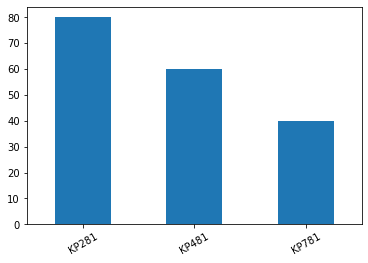

In [10]:
aerofit['Product'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 30)
plt.show()

<b> Observation </b> <br>

We can say that KP281 is most selling product since it is cheaper as compared to KP781 which is costlier. KP481 is intermediate cost hence is in between both the products.

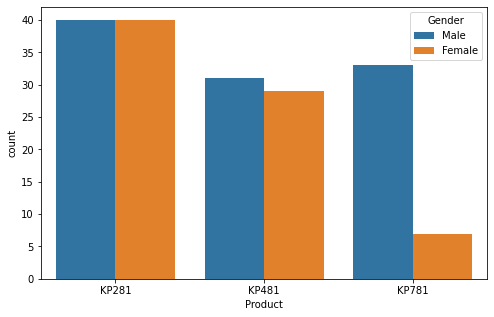

In [11]:
fig = plt.figure(figsize = (8, 5))
sns.countplot(x = 'Product', data = aerofit, hue = 'Gender')
plt.show()

<b> Observation </b> <br>

If we see gender wise product purchased then Males and females have equally bought KP281 product but males tend to buy more KP481 and KP781 trademills.

<b> Recommendation </b> <br>

For product KP281 both male and female are our potential customer and so is the case for KP481 as there is a slight difference between males and females who bought KP481 but for KP781 the target audience is males as compared to females as it is mostly being bought by male customers.

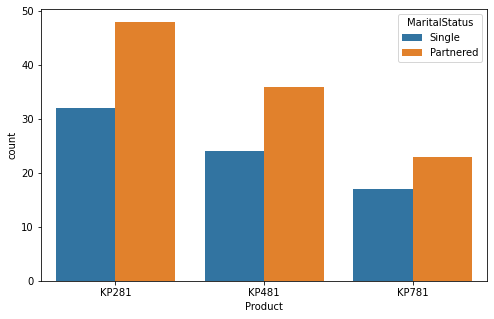

In [12]:
fig = plt.figure(figsize = (8, 5))
sns.countplot(x = 'Product', data = aerofit, hue = 'MaritalStatus')
plt.show()

<b> Recommendation </b> <br>

If we see MaritalStatus based count for each product then we can notice that for KP281, KP481 and KP781 product people who are partnered have bought more trademills as compared to Single People, hence aerofit can come up with more offers for Partnered people to ramp up their sales but they should not loose focus on Single as they are also customers.

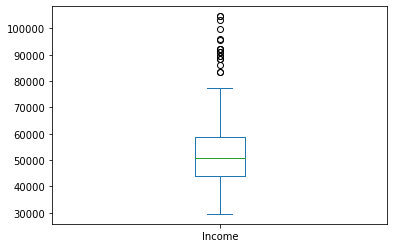

In [13]:
aerofit['Income'].plot(kind = 'box')
plt.show()

In [14]:
np.median(aerofit['Income'])

50596.5

<b> Observation </b> <br>

If we see the above boxplot then we can say that Median Income is 50000 dollars but some people are earning more than 80000 dollars which are considered as outliers for the dataset.
So, there are several outliers in the dataset where the income of the individual is higher than 80000 dollars and they still have purchased the trademills. <br>
We can say that peple having salary more than 30000 dollars are purchasing the trademill and there are no customers with salary less than 30000 dollars.

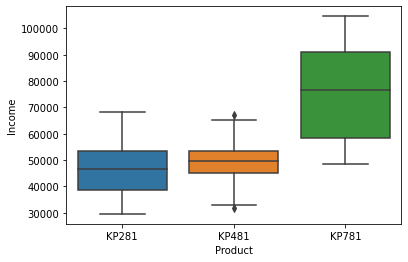

In [15]:
sns.boxplot(x = 'Product', y = 'Income', data = aerofit)
plt.show()

<b> Observation </b> <br>

If we see above boxplot then a person whose median or average salary (we are considering average here because median is a good measure of central tendency when there are outliers) is around 45000 dollars for product KP281. It is 51000 dollars for KP481 and around 80000 dollars for KP781.

Hence, wealthier people are most likely to purchase KP781 product

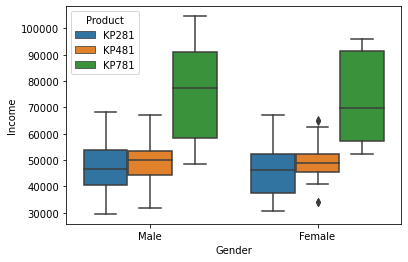

In [16]:
sns.boxplot(x = 'Gender', y = 'Income', hue = 'Product', data = aerofit)
plt.show()

<b> Recommendation </b> <br>

On seeing the above boxplot we can say that males with salary of more than 70000 dollars are potential customers for KP781 and more campaign or ads can be done to close more sales whereas in case of females there is a general distribution and females earning good tend to buy costlier trademills and with less salary they buy KP281.

Also, interestingly males and females buying KP281 have similar median income so any customer with low salary range irrespective of gender can be prescribed product KP281.

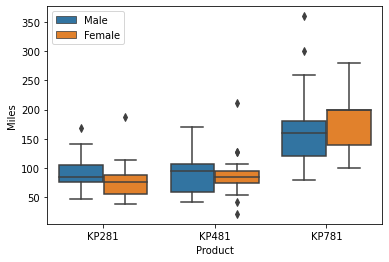

In [17]:
sns.boxplot(x = 'Product', y = 'Miles', hue = 'Gender', data = aerofit)
plt.legend(loc = 'upper left')
plt.show()

<b> Observation </b> <br>

If we see above boxplot then a person who is a fitness freak or health conscious is purchasing KP781 irrespective of Female or Male gender and the same can be verified from the above boxplot.

KP281 is mostly purchased by those females who run less miles and had just purchased to let themselves in shape. So any female looking for light running can go for KP281 product although there are some outliers here as maybe salary is not hight but she is a fitness freak.

For male customers also we can say that someone running less than 100 miles week tend to purchase KP281 and someone running below 150 miles and above 100 miles will pruchase KP481 and a fitness freak will go for KP781.

<b> Recommendation </b> <br>

For fitness freaks or health conscious people we can recommend KP781 product who wants to run atleast 150 miles (ignoring outliers in this case) irrespective of gender.

In [18]:
pd.crosstab(aerofit.Product, aerofit.Gender, normalize = 'columns')

Gender,Female,Male
Product,,
KP281,0.526316,0.384615
KP481,0.381579,0.298077
KP781,0.092105,0.317308


<b> Recommendation </b> <br>

On finding marginal probability for gender wise females are 52% likely to buy product KP281, 38% for product KP481 and 9% for product KP781. <br>
On the other hand, males have approximately equal probabilites of purchasing all three trademill but probability for purchasing trademill KP281 is little higher

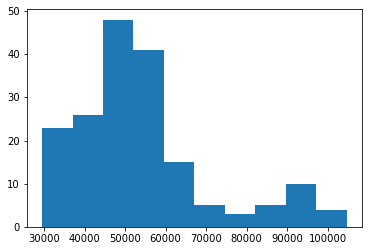

In [19]:
plt.hist(aerofit['Income'], bins = 10)
plt.show()

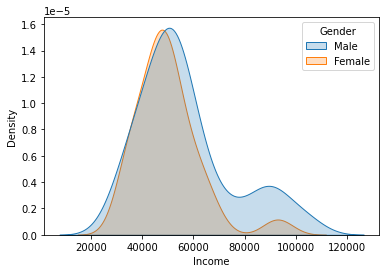

In [20]:
sns.kdeplot(x = 'Income', hue = 'Gender', data = aerofit, fill = True)
plt.show()

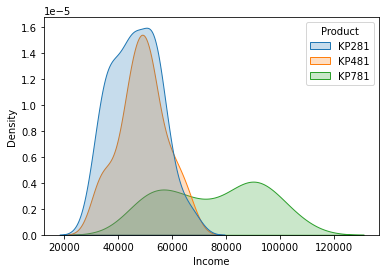

In [21]:
sns.kdeplot(x = 'Income', hue = 'Product', data = aerofit, fill = True)
plt.show()

<b> Observation </b> <br>

If we look at above density plot and histogram then people with salary 50000 dollars are most buyers and for male and female the salary distribution is similar except at higher ranges when salary increase 75000 dollars.

Also, KP781 is bought frequently when salary is very high and KP481 & KP281 is when salary is around 50000 dollars or when salary is low.

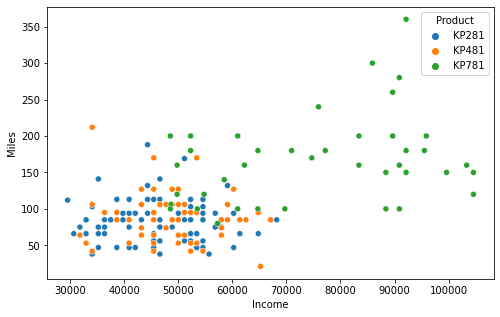

In [22]:
fig = plt.figure(figsize = (8, 5))
sns.scatterplot(x = 'Income',y = 'Miles', data = aerofit, hue = 'Product')
plt.show()

<b> Observation </b> <br>

If we look at above plot then people who have bought KP781 has high income and are those people who run more miles. The same analysis was done above and it clearly matches with this.

Also, for KP281 and KP481 income is less than 70000 dollars and are mostly people who run for good health but are not fitness freaks.

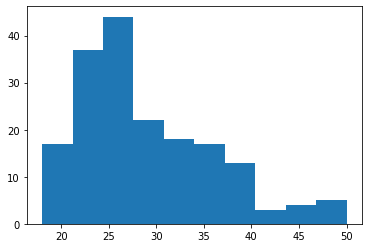

In [23]:
plt.hist(aerofit['Age'])
plt.show()

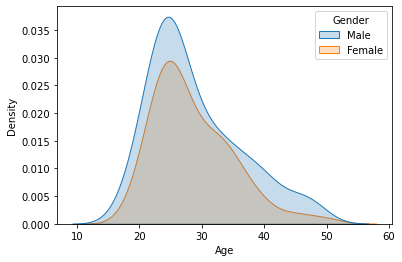

In [24]:
sns.kdeplot(x = 'Age', hue = 'Gender', data = aerofit, fill = True)
plt.show()

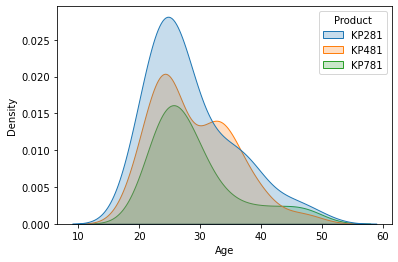

In [25]:
sns.kdeplot(x = 'Age', hue = 'Product', data = aerofit, fill = True)
plt.show()

<b> Observation </b> <br>

If we look at above plot then people using these trademills are mostly between 20 to 30 years age who are generally more active in nature. People more than 50 years of age are very less and there is no one more than 60 years of age as after this age exercise becomes troublesome.

The age distribution for male and female is almost similar.

Also, KP781 is bought by younger people than older people while KP481 is bought by every age group people while KP281 is bought by also nearly every age group

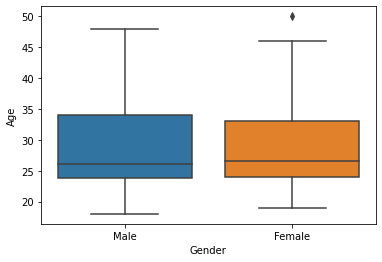

In [26]:
sns.boxplot(x = 'Gender', y = 'Age', data = aerofit)
plt.show()

<b> Observation </b> <br>

If we look at the boxplot then Male people median age who purchased these trademills is around 26 while for female it is 28. Also, there is a female whose age is near 50 and is an outlier but we cannot see this behaviour in males.

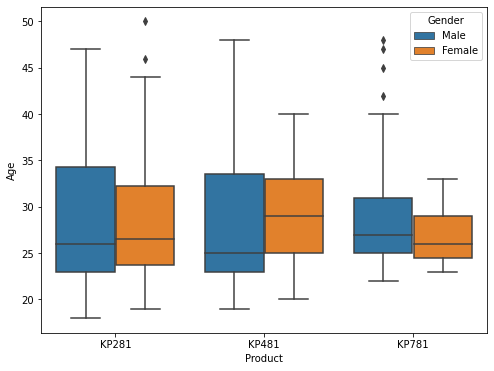

In [27]:
fig = plt.figure(figsize = (8,6))

sns.boxplot(x = 'Product', y = 'Age', hue = 'Gender', data = aerofit)
plt.show()

<b> Observation </b> <br>

If we look at the boxplot then KP781 product is generally purchased by people below 30 years age as they are highly worried about health or they maybe atheletes. There are rare cases where male people beyond 40 have purchased KP781 and for that main reason is income. No female person beyond 35 go for KP781

For KP481 people with good income and around 30 years of age are buying them (in case of females) and for males it is 25.

For KP281 people less than 27 years are buying to stay fit

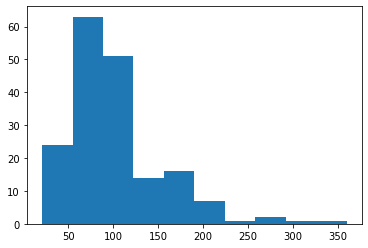

In [28]:
plt.hist(aerofit['Miles'])
plt.show()

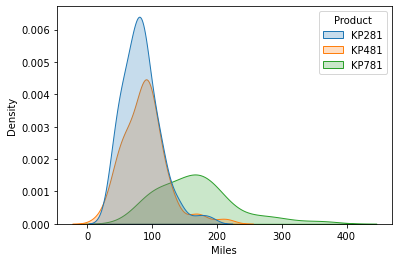

In [29]:
sns.kdeplot(x = 'Miles', hue = 'Product', data = aerofit, fill = True)
plt.show()

<b> Observation </b> </br>

If we look at the above density or histogram then person who tends to burn more calories or run more miles tend to pruchase KP781 while people intending to burn near 110 or 120 calories buy KP481 while for normal routine or exercise people buy KP281.

<b> Recommendation </b> </br>

As suggested above people who are fitness freaks will definitely go for KP781 while people intending to run or loose weight can go for KP481 and for normal routine can go for KP281

In [30]:
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [31]:
bins = [0, 20, 28, 40, 50, 60, 100]

aerofit['Age Bin'] = pd.cut(aerofit['Age'], bins = bins)
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age Bin
0,KP281,18,Male,14,Single,3,4,29562,112,"(0, 20]"
1,KP281,19,Male,15,Single,2,3,31836,75,"(0, 20]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(0, 20]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(0, 20]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(0, 20]"


In [32]:
pd.crosstab(aerofit.Product, aerofit['Age Bin'], normalize = 'columns')

Age Bin,"(0, 20]","(20, 28]","(28, 40]","(40, 50]"
Product,,,,
KP281,0.6,0.453608,0.393443,0.500000
KP481,0.4,0.288660,0.426230,0.166667
KP781,0.0,0.257732,0.180328,0.333333


<b> Recommendation </b> <br>

On seeing above marginal probability for people between age group 0 to 20 KP281 has higher probability. <br>
For 20 to 28 years old people, KP281 should be recommended and for people between 28 to 40 KP481 should be recommended.

For 40 to 50 KP281 and KP781 both can be recommended.

In [33]:
bins = [0, 20000, 30000, 50000, 70000, 100000, 1000000]

aerofit['IncomeBin'] = pd.cut(aerofit['Income'], bins = bins)
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age Bin,IncomeBin
0,KP281,18,Male,14,Single,3,4,29562,112,"(0, 20]","(20000, 30000]"
1,KP281,19,Male,15,Single,2,3,31836,75,"(0, 20]","(30000, 50000]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(0, 20]","(30000, 50000]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(0, 20]","(30000, 50000]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(0, 20]","(30000, 50000]"


In [34]:
pd.crosstab(aerofit.Product, aerofit['IncomeBin'], normalize = 'columns')

IncomeBin,"(20000, 30000]","(30000, 50000]","(50000, 70000]","(70000, 100000]","(100000, 1000000]"
Product,,,,,
KP281,1.0,0.573171,0.432432,0.0,0.0
KP481,0.0,0.365854,0.405405,0.0,0.0
KP781,0.0,0.060976,0.162162,1.0,1.0


<b> Recommendation </b> <br>

On seeing above marginal probability for people having salary higher than 75000 dollars should buy KP781 and people having salary below 30000 dollars should be recommended KP281.

Now, for people having salary between 30000 to 50000 dollars and 50000 to 70000 dollars KP281 and KP481 both can be recommended as probabilities are very nearby.

In [35]:
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age Bin,IncomeBin
0,KP281,18,Male,14,Single,3,4,29562,112,"(0, 20]","(20000, 30000]"
1,KP281,19,Male,15,Single,2,3,31836,75,"(0, 20]","(30000, 50000]"
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(0, 20]","(30000, 50000]"
3,KP281,19,Male,12,Single,3,3,32973,85,"(0, 20]","(30000, 50000]"
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(0, 20]","(30000, 50000]"


In [36]:
pd.crosstab(aerofit.Product, aerofit.Usage, normalize = 'columns')

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.575758,0.536232,0.423077,0.117647,0.0,0.0
KP481,0.424242,0.449275,0.230769,0.176471,0.0,0.0
KP781,0.000000,0.014493,0.346154,0.705882,1.0,1.0


<b> Recommendation </b> <br>

On seeing above marginal probability people who use trademill more than 4 times a week tend to buy KP781 more as compared to others.

Also, people using trademill twice or thrice a week tend to buy KP281 and KP481 almost equally whereas people running four times a week has almost equal distribution for purchasing trademill.